In [124]:
import pandas as pd
import numpy as np
import time
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [125]:
path='datas\household_power_consumption_1000.txt'
names=['Date','Time','Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']

In [126]:
#读取数据
df = pd.read_csv(path,sep=';')

In [127]:
#打印了前五行数据
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [128]:
#看所有的变量值
# for i in df.columns:
#     print df[i].value_counts()

In [129]:
#空值的处理
new_df = df.replace('?',np.nan)
datas = new_df.dropna(how='any')

In [130]:
#创建一个时间字符串格式化
def date_format(dt):
    import time
    t = time.strptime(' '.join(dt),'%d/%m/%Y %H:%M:%S')
    return(t.tm_year,t.tm_mon,t.tm_mday,t.tm_hour,t.tm_min,t.tm_sec)

In [131]:
#获取X，Y变量，讲时间转换为数值型的连续变量
X = datas[names[0:2]]
X = X.apply(lambda x :pd.Series(date_format(x)),axis=1)
Y = datas[names[2]]

In [132]:
print(X.head(5))
print(Y.head(5))

      0   1   2   3   4  5
0  2006  12  16  17  24  0
1  2006  12  16  17  25  0
2  2006  12  16  17  26  0
3  2006  12  16  17  27  0
4  2006  12  16  17  28  0
0    4.216
1    5.360
2    5.374
3    5.388
4    3.666
Name: Global_active_power, dtype: float64


In [133]:
# 对数据集进行训练集、测试集划分
# random_state 是随机数的种子。其实就是该组随机数的编号，在需要重复试验的时候，保证得到一组一样的随机数。
# 种子不同，产生不同的随机数；种子相同，即使实例不同也产生相同的随机数。
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [134]:
# 标准化：将数据变换为均值为0、标准差为1的标准正态分布，使得预测结果不会被某些维度过大的特征值而主导
# 标准化并不是为了方便与其他数据一同处理或比较，而是为数据的下一步处理做准备
# 比如数据经过零-均值标准化后，更利于使用标准正态分布的性质
ss=StandardScaler()
# fit_transform()先训练拟合数据，再标准化
X_train=ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# PS: 归一化与标准化的区别：https://www.zhihu.com/question/20467170

In [135]:
#训练模型
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [136]:
#模型检验
print("准确率：",lr.score(X_train,Y_train))

准确率： 0.244093118059


In [137]:
#预测y值
y_predict = lr.predict(X_test)

In [138]:
from sklearn.externals import joblib
#模型保存
joblib.dump(ss,"data_ss.model")
joblib.dump(lr,"data_lr.model")
#加载模型
joblib.load("data_ss.model")
joblib.load("data_lr.model")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [139]:
#设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

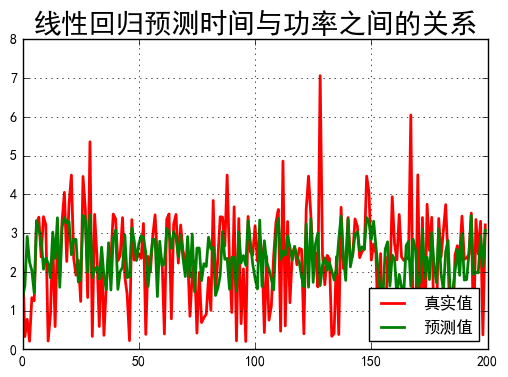

In [140]:
#预测值与实际值画(图比较
t = np.arange(len(X_test))
plt.figure(facecolor='w')
plt.plot(t,Y_test,'r-',linewidth=2,label=u'真实值')
plt.plot(t,y_predict,'g-',linewidth=2,label=u'预测值')   
plt.legend(loc='lower right')
plt.title(u'线性回归预测时间与功率之间的关系',fontsize=20)
plt.grid(b=True)
plt.show()